# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
renda_csv = pd.read_csv('previsao_de_renda.csv')
var_quant = renda_csv.select_dtypes(include=['number'])
df_limpo = var_quant.drop(columns=['Unnamed: 0','index'],
                          errors='ignore')

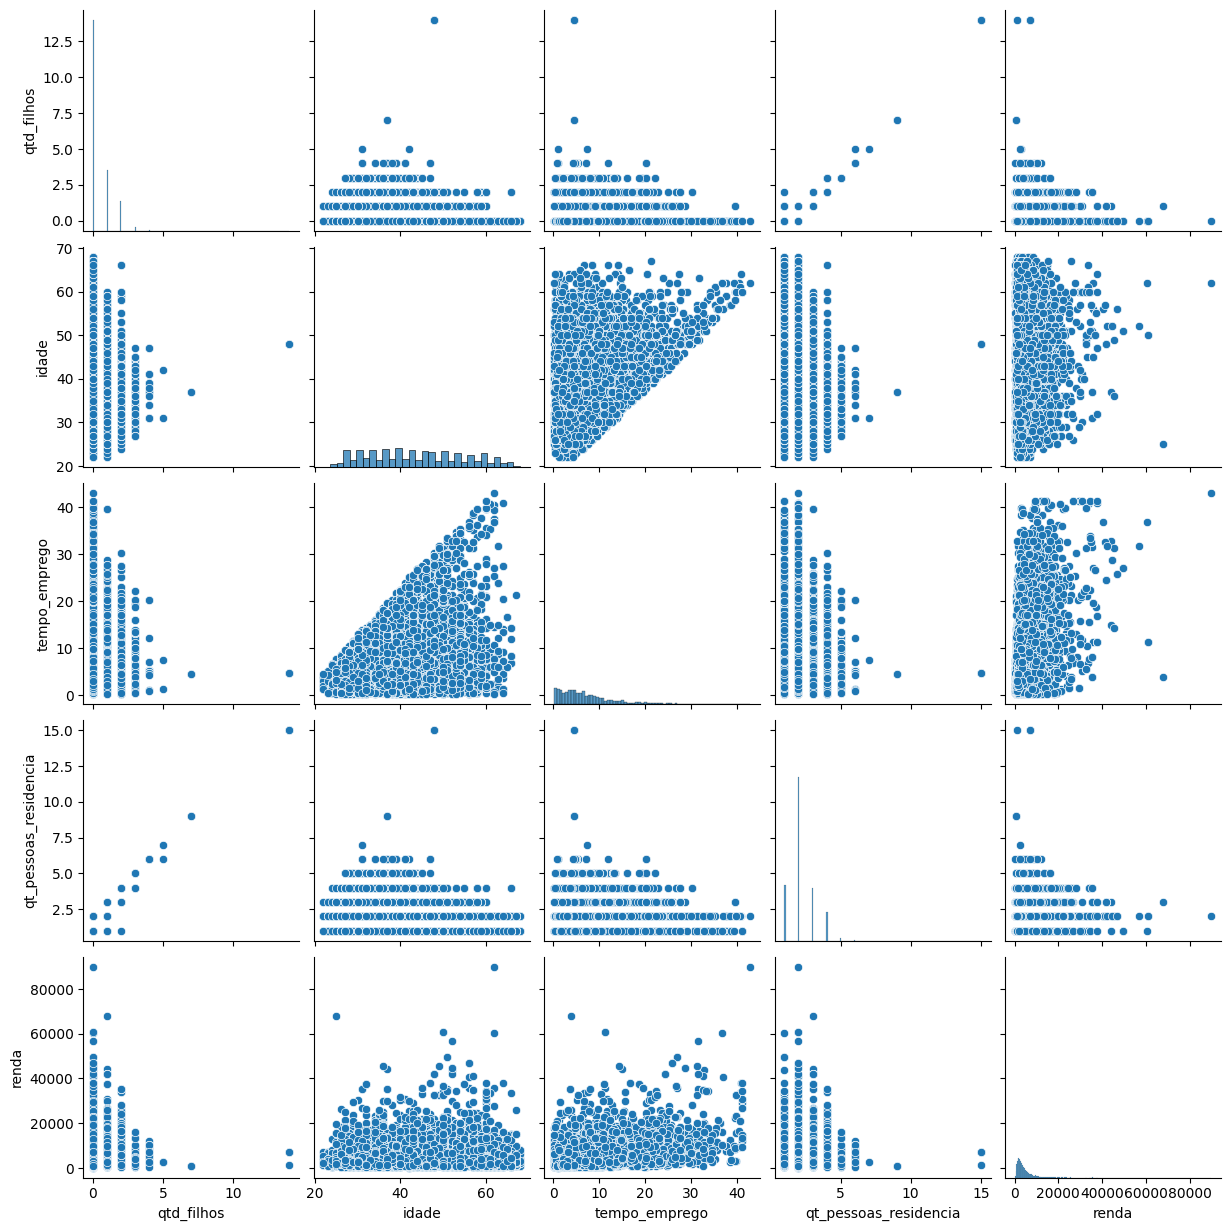

In [41]:
sns.pairplot(df_limpo)

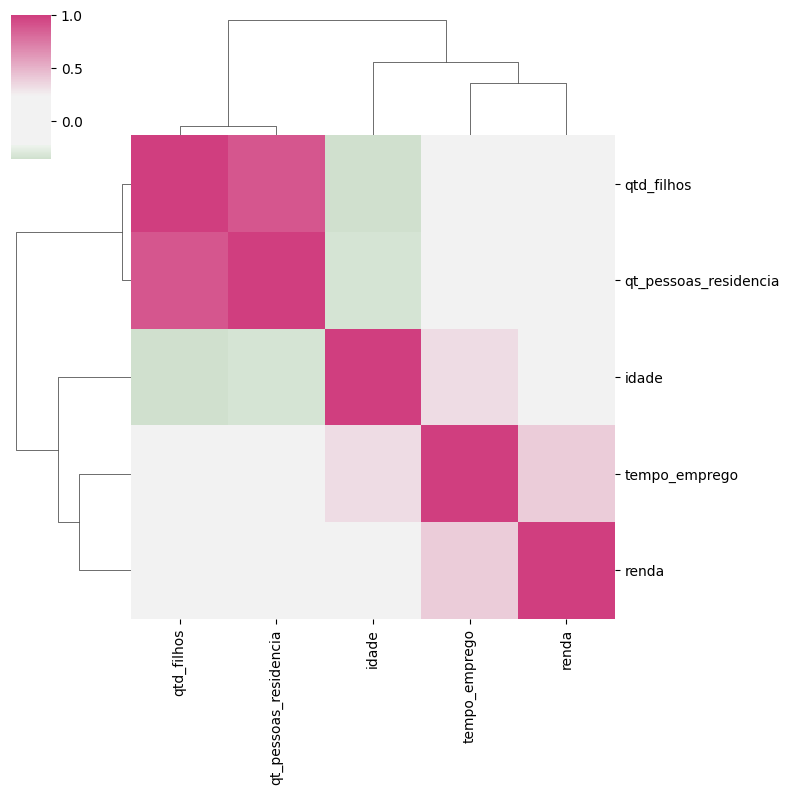

In [53]:
cmap = sns.diverging_palette(h_neg=125,
                             h_pos=350,
                             as_cmap=True,
                             sep=60,
                             center='light')
sns.clustermap(df_limpo.corr(),
               figsize=[8,8],
               center=0,
               cmap=cmap)

# Pairplot

The age-employment relationship is slightly positive.
There are several points spread across the graph, which indicates outliers.

# Clustermap
There is a strong relationship between income and length of employment, age and length of employment. It is clear that family issues (qtd_filhos, qtd_pessoas_residencia) do not have a strong connection with financial issues.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

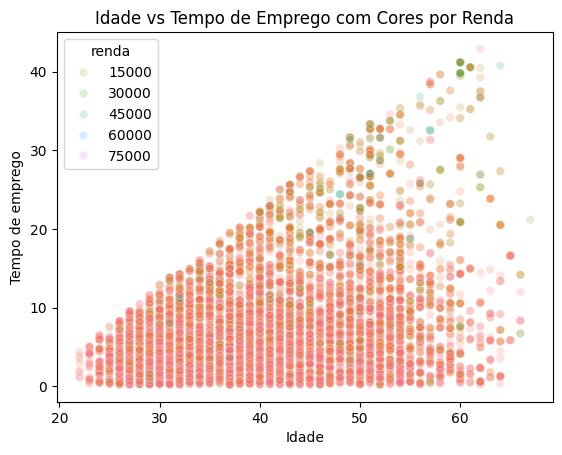

In [84]:
sns.scatterplot(x='idade',
                y='tempo_emprego',
                data=df_limpo,
                alpha=.2,
                hue='renda',
                palette='husl')
plt.title("Idade vs Tempo de Emprego com Cores por Renda")
plt.xlabel('Idade')
plt.ylabel('Tempo de emprego')
plt.show()

3) Na sua opinião, há outliers na variável renda?

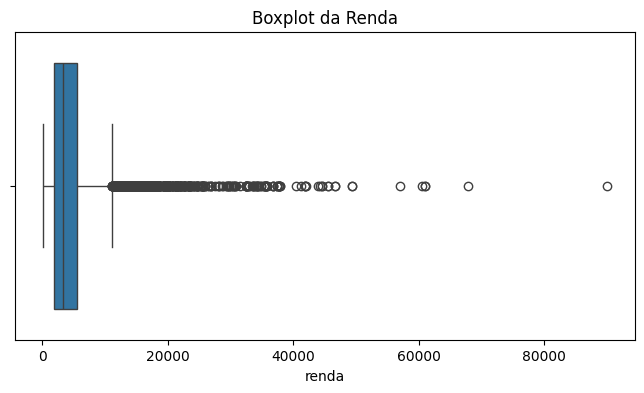

In [90]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_limpo['renda'])
plt.title('Boxplot da Renda')
plt.show()

Yes, have outliers in 'renda'.

# Boxplot

Points outside the box indicate outliers.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

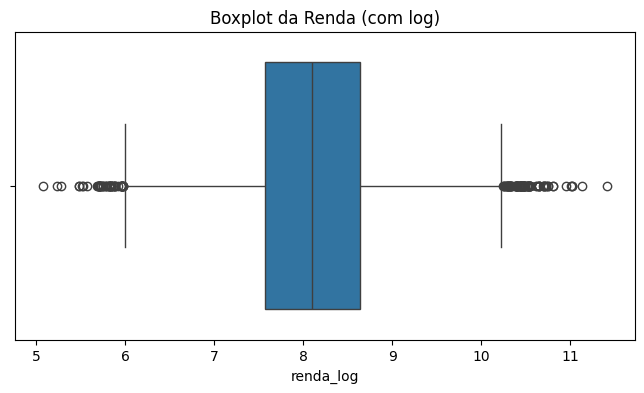

In [105]:
df_log = df_limpo.copy()
df_log['renda_log'] = np.log(df_log['renda'])

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_log['renda_log'])
plt.title('Boxplot da Renda (com log)')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

The distribution is much more symmetrical now than at the original scale.
There are still outliers in the right tail, but they are more visually contained.
The log reduces the impact of extreme values, making it easier to visualize the central tendency and dispersion of the data.